In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import re 
import nltk
import seaborn as sns

nltk.download('punkt', download_dir='C:/Users/User/nltk_data')
nltk.download('punkt_tab', download_dir='C:/Users/User/nltk_data')
nltk.download('wordnet', download_dir='C:/Users/User/nltk_data')
nltk.download('omw-1.4', download_dir='C:/Users/User/nltk_data')
nltk.download('averaged_perceptron_tagger_eng', download_dir='C:/Users/User/nltk_data') 
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag, word_tokenize
from collections import Counter
import numpy as np
import random


[nltk_data] Downloading package punkt to C:/Users/User/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:/Users/User/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to C:/Users/User/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:/Users/User/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:/Users/User/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [70]:
df = pd.read_csv("text.csv")
#df = df.head(1000)
if df.columns[0] == "Unnamed: 0":
    df.rename(columns={"Unnamed: 0": "index"}, inplace=True)
df.set_index("index", inplace= True)

print(df)

                                                     text  label
index                                                           
0           i just feel really helpless and heavy hearted      4
1       ive enjoyed being able to slouch about relax a...      0
2       i gave up my internship with the dmrg and am f...      4
3                              i dont know i feel so lost      0
4       i am a kindergarten teacher and i am thoroughl...      4
...                                                   ...    ...
416804  i feel like telling these horny devils to find...      2
416805  i began to realize that when i was feeling agi...      3
416806  i feel very curious be why previous early dawn...      5
416807  i feel that becuase of the tyranical nature of...      3
416808  i think that after i had spent some time inves...      5

[416809 rows x 2 columns]


In [33]:
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
pos_tags = []
def lemmatize_sentence(sentence):
    sentence = sentence.split()
    tokens = word_tokenize(" ".join (sentence))
    pos_tags = pos_tag(tokens)
    print(pos_tags)
    lemmatized = [
        lemmatizer.lemmatize(word, get_wordnet_pos(pos))
        for word, pos in pos_tags
    ]
    return ' '.join(lemmatized)

In [35]:
stopwords = {w.strip().lower() for w in open("stopwords.txt")}
tokens = []

def clean_text(text, stop_set=stopwords):
    row_tokens = re.findall(r"[a-zA-Z]+", text.lower())
    row_tokens = [w for w in row_tokens if w not in stop_set]
    tokens.extend(row_tokens)
    return " ".join(row_tokens)

def remove_ing(word):
    return re.sub(r'ing$', '', word)

df["text"] = df["text"].apply(clean_text)
df["lemmatized_text"] = df["text"].apply(lemmatize_sentence)
df["lemmatized_text"] = df["lemmatized_text"].apply(lambda sentence: " ".join(remove_ing(word) for word in sentence.split()))
df["lemmatized_text"] = df["lemmatized_text"].apply(clean_text)


[('just', 'RB'), ('feel', 'VB'), ('helpless', 'JJ'), ('heavy', 'JJ'), ('hearted', 'VBD')]
[('enjoyed', 'VBN'), ('being', 'VBG'), ('able', 'JJ'), ('slouch', 'JJ'), ('relax', 'NN'), ('unwind', 'JJ'), ('frankly', 'RB'), ('needed', 'VBN'), ('last', 'JJ'), ('weeks', 'NNS'), ('end', 'VBP'), ('uni', 'JJ'), ('expo', 'NN'), ('lately', 'RB'), ('started', 'VBD'), ('find', 'RB'), ('feeling', 'JJ'), ('bit', 'NN'), ('listless', 'JJ')]
[('gave', 'VBD'), ('internship', 'NN'), ('dmrg', 'NN'), ('feeling', 'NN'), ('distraught', 'NN')]
[('dont', 'NN'), ('know', 'VBP'), ('feel', 'NN'), ('lost', 'VBD')]
[('kindergarten', 'VB'), ('teacher', 'PRP'), ('weary', 'JJ'), ('job', 'NN'), ('taken', 'VBN'), ('university', 'NN'), ('entrance', 'NN'), ('exam', 'NN'), ('suffered', 'VBD'), ('anxiety', 'NN'), ('weeks', 'NNS'), ('want', 'VBP'), ('carry', 'JJ'), ('work', 'NN'), ('studies', 'NNS'), ('only', 'RB'), ('alternative', 'VBP')]
[('beginning', 'VBG'), ('feel', 'NN'), ('disheartened', 'VBD')]
[('think', 'NN'), ('lucky'

In [5]:
print(df)

                                                     text  label  \
index                                                              
0           i just feel really helpless and heavy hearted      4   
1       ive enjoyed being able to slouch about relax a...      0   
2       i gave up my internship with the dmrg and am f...      4   
3                              i dont know i feel so lost      0   
4       i am a kindergarten teacher and i am thoroughl...      4   
...                                                   ...    ...   
416804  i feel like telling these horny devils to find...      2   
416805  i began to realize that when i was feeling agi...      3   
416806  i feel very curious be why previous early dawn...      5   
416807  i feel that becuase of the tyranical nature of...      3   
416808  i think that after i had spent some time inves...      5   

                                          lemmatized_text  
index                                                  

In [58]:
def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            if lemma.name().lower() != word.lower():
                synonyms.add(lemma.name().replace('_', ' '))
    return list(synonyms)

get_synonyms('sad')


['pitiful', 'distressing', 'deplorable', 'lamentable', 'sorry']

In [ ]:
def augment_sentence(sentence, emotion_words = ['sad', 'angry', 'happy', 'joy', 'fear', 'love'], num_augments=3):
    words = sentence.split()
    new_sentences = [sentence]

    for _ in range(num_augments):
        new_words = []
        for word in words:
            # If it's an emotion-related word, try replacing it
            if word.lower() in emotion_words:
                syns = get_synonyms(word)
                if syns:
                    new_word = random.choice(syns)
                    new_words.append(new_word)
                else:
                    new_words.append(word)
            else:
                new_words.append(word)
        new_sentences.append(' '.join(new_words))
    
    return new_sentences


sentence = "I feel sad and angry"

df["augmented_text"] = df["lemmatized_text"].apply(augment_sentence)
df["augmented_text"][1]


In [7]:
augmented_texts = []
augmented_labels = []

for i, row in df.iterrows():
    augments = augment_sentence(row['text'], emotion_words, num_augments=2)
    augmented_texts.extend(augments)
    augmented_labels.extend([row['label']] * len(augments))

In [13]:
df.head()

,text,label,lemmatized_text
index,,,
0,i just feel really helpless and heavy hearted,4,just feel helpless heavy hearted
1,ive enjoyed being able to slouch about relax a...,0,enjoy able slouch relax unwind frankly need la...
2,i gave up my internship with the dmrg and am f...,4,give internship dmrg feel distraught
3,i dont know i feel so lost,0,dont know feel lose
4,i am a kindergarten teacher and i am thoroughl...,4,kindergarten teacher weary job take university...


In [11]:
vc = pd.Series(tokens).value_counts()
vc = vc.head(7000)
words = list(vc.index.unique())
print(len(words))

7000


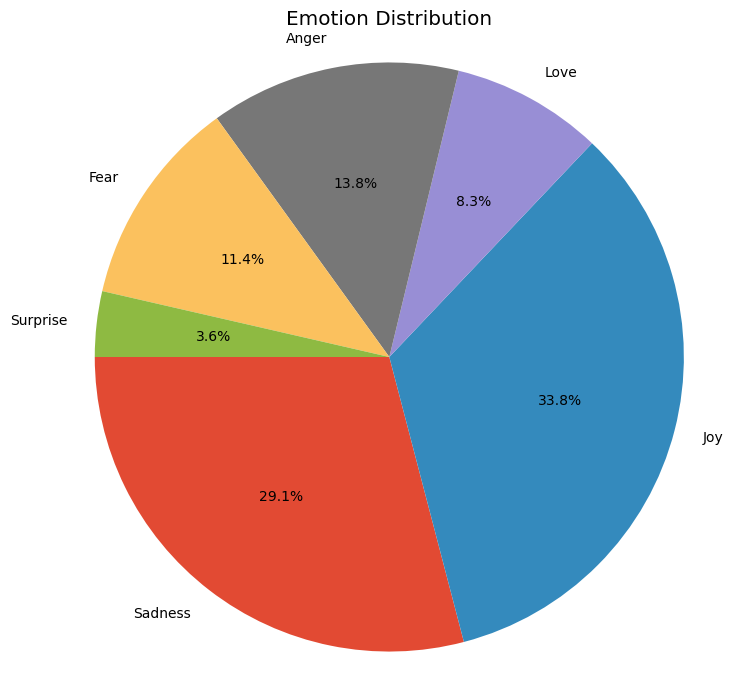

In [93]:

# Count the number of entries per label
label_counts = df['label'].value_counts().sort_index()

# Define emotion names to match the labels
emotion_names = ['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise']

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=emotion_names, autopct='%1.1f%%', startangle=180)
plt.title('Emotion Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

In [ ]:
word_to_index = {}
index = 1 

for word in words:
    if word not in word_to_index:
        word_to_index[word] = index
        index += 1
print("Vocabulary:", word_to_index)


In [ ]:
# 1️⃣  Build / extend the vocabulary
special_tokens = ["<PAD>", "<UNK>", "<SOS>", "<EOS>"]

word_to_index = {}             # or load your existing dict here
for tok in special_tokens:      # make sure the specials are present first
    if tok not in word_to_index:
        word_to_index[tok] = len(word_to_index)

# Optionally add your corpus words afterwards
for sent in sentences:          # sentences is a list of token lists
    for word in sent:
        if word not in word_to_index:
            word_to_index[word] = len(word_to_index)

# 2️⃣  Keep the index of <UNK> handy
UNK_IDX = word_to_index["<UNK>"]

# 3️⃣  Robust mapping function
def sentence_to_sequence(sentence, word_to_index, unk_index=UNK_IDX):
    """
    Convert a list of tokens to their indices.
    Unknown words map to `unk_index`.
    """
    return [word_to_index.get(word, unk_index) for word in sentence]

# 4️⃣  Vectorise every sentence
sequences = [sentence_to_sequence(sent, word_to_index) for sent in sentences]
print("Sequences:", sequences[:10])


In [ ]:
all_words = []
for sentence in df['text']:
    all_words.extend(clean_text(sentence))

word_freq = Counter(all_words)

word2idx = {word: idx+2 for idx, word in enumerate(all_words)}

word2idx['<PAD>'] = 0
word2idx['<UNK>'] = 1

def text_to_sequence(text):
    return [word2idx.get(word, word2idx['<UNK>']) for word in clean_text(text)]


df['sequence'] = df['text'].apply(text_to_sequence)

In [ ]:
df['sequence']

In [ ]:

def pad_sequences(sequences, max_len):
    padded = np.zeros((len(sequences), max_len), dtype=int)
    for i, seq in enumerate(sequences):
        length = min(len(seq), max_len)
        padded[i, :length] = seq[:length]
    return padded

# Example: set max_len (you can use 50, 100, or based on your data)
max_len = 50  # try different values if needed

# Apply padding
padded_array = pad_sequences(df['sequence'], max_len)

In [ ]:
padded_array

In [71]:
list_sadness = []
list_joy = []
list_love = []
list_anger = []
list_fear = []
list_surprise = []
list_unlabeled = []
def categorize_emotions(row):
    if row['label'] == 0:
        list_sadness.append(row['text'])
    elif row['label'] == 1:
        list_joy.append(row['text'])
    elif row['label'] == 2:
        list_love.append(row['text'])
    elif row['label'] == 3:
        list_anger.append(row['text'])
    elif row['label'] == 4:
        list_fear.append(row['text'])
    elif row['label'] == 5:
        list_surprise.append(row['text'])
    return row
df = df.apply(categorize_emotions, axis=1)

In [72]:
sadness = pd.DataFrame({'text': list_sadness, 'label': 0})
joy = pd.DataFrame({'text': list_joy, 'label': 1})
love = pd.DataFrame({'text': list_love, 'label': 2})
anger = pd.DataFrame({'text': list_anger, 'label': 3})
fear = pd.DataFrame({'text': list_fear, 'label': 4})
surprise = pd.DataFrame({'text': list_surprise, 'label': 5})

In [73]:
sorted_df = pd.concat([sadness, joy, love, anger, fear, surprise], ignore_index=True)


In [74]:
print(sorted_df)

                                                     text  label
0       ive enjoyed being able to slouch about relax a...      0
1                              i dont know i feel so lost      0
2              i was beginning to feel quite disheartened      0
3       i can still lose the weight without feeling de...      0
4       im feeling a little like a damaged tree and th...      0
...                                                   ...    ...
416804                 i feel like i ve just been stunned      5
416805  i feel like the muscles in and around our eyes...      5
416806  i feel that i must confess even though it kill...      5
416807  i feel very curious be why previous early dawn...      5
416808  i think that after i had spent some time inves...      5

[416809 rows x 2 columns]


In [75]:
sadness_tokens  = []
joy_tokens      = []
love_tokens     = []
anger_tokens    = []
fear_tokens     = []
surprise_tokens = []

def tokenize_sadness(row):
    token = row['text'].split()
    sadness_tokens.extend(token)
    return row
def tokenize_joy(row):
    token = row['text'].split()
    joy_tokens.extend(token)
    return row
def tokenize_love(row):
    token = row['text'].split()
    love_tokens.extend(token)
    return row
def tokenize_anger(row):
    token = row['text'].split()
    anger_tokens.extend(token)
    return row
def tokenize_fear(row):
    token = row['text'].split()
    fear_tokens.extend(token)
    return row
def tokenize_surprise(row):
    token = row['text'].split()
    surprise_tokens.extend(token)
    return row
sadness = sadness.apply(tokenize_sadness, axis=1)
joy = joy.apply(tokenize_joy, axis=1)
love = love.apply(tokenize_love, axis=1)
anger = anger.apply(tokenize_anger, axis=1)
fear = fear.apply(tokenize_fear, axis=1)
surprise = surprise.apply(tokenize_surprise, axis=1)


In [68]:
sadness_words_vc  = pd.Series(sadness_tokens).value_counts()
joy_words_vc      = pd.Series(joy_tokens).value_counts()
love_words_vc     = pd.Series(love_tokens).value_counts()
anger_words_vc    = pd.Series(anger_tokens).value_counts()
fear_words_vc     = pd.Series(fear_tokens).value_counts()
surprise_words_vc = pd.Series(surprise_tokens).value_counts()